In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
x = iris.data
x.shape

(150, 4)

In [6]:
y = iris.target
y.shape

(150,)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=47)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [12]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 14]], dtype=int64)

In [13]:
acc = accuracy_score(y_test,y_pred)
acc

0.9736842105263158

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.96      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [15]:
accuracy = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    Y_pred = KNN.predict(x_test)
    r = accuracy_score(y_test,Y_pred)
    accuracy.append(r)

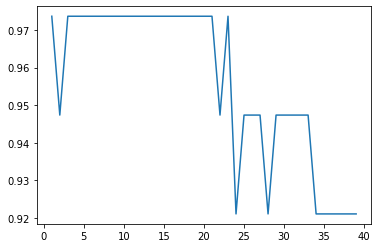

In [16]:
plt.plot(range(1,40),accuracy)          
plt.show()